In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales 2025-I*

---

# 1.

<center>

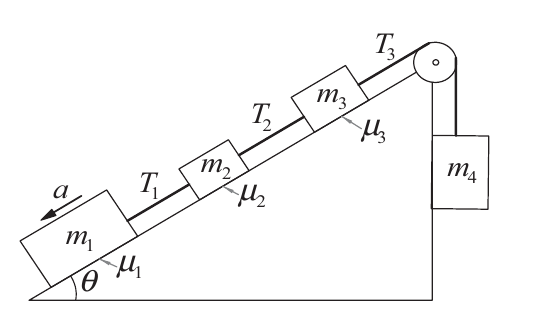

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta) 
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta) 
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta) 
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [2]:
# Se definen las constantes fisicas.
g = 9.81 # Aceleracion gravitatoria en m/s^2
theta_grados = 45
theta_rad = np.deg2rad(theta_grados) # Angulo de inclinacion en radianes

# Se definen los datos de los bloques.
masas = np.array([10, 4, 5, 6]) # m1, m2, m3, m4 en kg
coef_friccion = np.array([0.25, 0.3, 0.2]) # mu1, mu2, mu3

In [3]:
# Se inicializa la matriz A (4x4) y el vector b (4x1).
matriz_A = np.zeros((4, 4))
vector_b = np.zeros(4)

# Se extraen las masas para mayor claridad.
m1, m2, m3, m4 = masas
mu1, mu2, mu3 = coef_friccion

# Fila 1: T1 + m1*a = m1*g*(sin(t) - mu1*cos(t))
matriz_A[0, 0] = 1
matriz_A[0, 3] = m1
vector_b[0] = m1 * g * (np.sin(theta_rad) - mu1 * np.cos(theta_rad))

# Fila 2: -T1 + T2 + m2*a = m2*g*(sin(t) - mu2*cos(t))
matriz_A[1, 0] = -1
matriz_A[1, 1] = 1
matriz_A[1, 3] = m2
vector_b[1] = m2 * g * (np.sin(theta_rad) - mu2 * np.cos(theta_rad))

# Fila 3: -T2 + T3 + m3*a = m3*g*(sin(t) - mu3*cos(t))
matriz_A[2, 1] = -1
matriz_A[2, 2] = 1
matriz_A[2, 3] = m3
vector_b[2] = m3 * g * (np.sin(theta_rad) - mu3 * np.cos(theta_rad))

# Fila 4: -T3 + m4*a = -m4*g
matriz_A[3, 2] = -1
matriz_A[3, 3] = m4
vector_b[3] = -m4 * g

print("--- Matriz A ---")
print(matriz_A)
print("\n--- Vector b ---")
print(vector_b)

--- Matriz A ---
[[ 1.  0.  0. 10.]
 [-1.  1.  0.  4.]
 [ 0. -1.  1.  5.]
 [ 0.  0. -1.  6.]]

--- Vector b ---
[ 52.02538143  19.42280907  27.74687009 -58.86      ]


In [4]:
def eliminacion_gaussiana(A, b):
    """
    Realiza la eliminacion hacia adelante para convertir una matriz A
    en una matriz triangular superior U. Modifica A y b en el proceso.
    """
    n = len(b)
    for k in range(n - 1):
        for i in range(k + 1, n):
            # Se calcula el factor para eliminar el elemento A[i,k].
            factor = A[i, k] / A[k, k]
            # Se actualiza el resto de la fila i.
            A[i, k:] = A[i, k:] - factor * A[k, k:]
            # Se actualiza el elemento correspondiente en el vector b.
            b[i] = b[i] - factor * b[k]
    return A, b

def sustitucion_hacia_atras(U, y):
    """
    Resuelve un sistema Ux = y para una matriz triangular superior U.
    """
    n = len(y)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        # Se calcula la suma de los terminos ya conocidos.
        suma = np.dot(U[i, i + 1:], x[i + 1:])
        # Se despeja la incognita x[i].
        x[i] = (y[i] - suma) / U[i, i]
    return x

In [5]:
matriz_A_copia = np.copy(matriz_A)
vector_b_copia = np.copy(vector_b)

# Se aplica la eliminacion gaussiana.
matriz_U, vector_y = eliminacion_gaussiana(matriz_A_copia, vector_b_copia)

# Se aplica la sustitucion hacia atras para encontrar la solucion.
solucion = sustitucion_hacia_atras(matriz_U, vector_y)

# Se extraen los valores de la solucion.
T1, T2, T3, a = solucion

print("--- Resultados del Sistema ---")
print(f"Aceleracion (a): {a:.4f} m/s²")
print(f"Tension 1 (T1):  {T1:.4f} N")
print(f"Tension 2 (T2):  {T2:.4f} N")
print(f"Tension 3 (T3):  {T3:.4f} N")

--- Resultados del Sistema ---
Aceleracion (a): 1.6134 m/s²
Tension 1 (T1):  35.8914 N
Tension 2 (T2):  48.8606 N
Tension 3 (T3):  68.5404 N


# 2. 
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

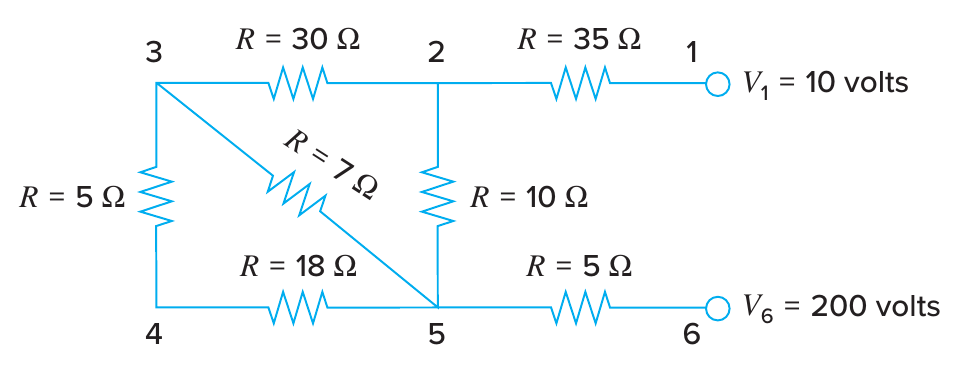


In [10]:
# Se definen los voltajes conocidos en los nodos 1 y 6.
v1 = 10.0
v6 = 200.0

# Se construye la matriz A basada en los coeficientes de V2, V3, V4 y V5.
matriz_A = np.array([
    # Ecuacion para el Nodo 2:
    [(1/35 + 1/30 + 1/10), -1/30, 0, -1/10],

    # Ecuacion para el Nodo 3:
    [-1/30, (1/30 + 1/5 + 1/7), -1/5, -1/7],

    # Ecuacion para el Nodo 4:
    [0, -1/5, (1/5 + 1/18), -1/18],

    # Ecuacion para el Nodo 5:
    [-1/10, -1/7, -1/18, (1/10 + 1/7 + 1/18 + 1/5)]
])

# Se construye el vector b con los terminos constantes.
vector_b = np.array([
    v1 / 35,
    0,
    0,
    v6 / 5
])

print("--- Matriz A ---")
print(matriz_A)
print("\n--- Vector b ---")
print(vector_b)

--- Matriz A ---
[[ 0.16190476 -0.03333333  0.         -0.1       ]
 [-0.03333333  0.37619048 -0.2        -0.14285714]
 [ 0.         -0.2         0.25555556 -0.05555556]
 [-0.1        -0.14285714 -0.05555556  0.4984127 ]]

--- Vector b ---
[ 0.28571429  0.          0.         40.        ]


In [11]:
# Se resuelve el sistema Ax = b para el vector x = [V2, V3, V4, V5].
voltajes_desconocidos = np.linalg.solve(matriz_A, vector_b)

# Se extraen los valores para cada voltaje.
v2, v3, v4, v5 = voltajes_desconocidos

print("\n--- Voltajes Nodales Calculados ---")
print(f"Voltaje en el nodo 2 (V2): {v2:.4f} V")
print(f"Voltaje en el nodo 3 (V3): {v3:.4f} V")
print(f"Voltaje en el nodo 4 (V4): {v4:.4f} V")
print(f"Voltaje en el nodo 5 (V5): {v5:.4f} V")


--- Voltajes Nodales Calculados ---
Voltaje en el nodo 2 (V2): 149.1337 V
Voltaje en el nodo 3 (V3): 175.4212 V
Voltaje en el nodo 4 (V4): 176.4435 V
Voltaje en el nodo 5 (V5): 180.1238 V


In [ ]:
# Se calculan las corrientes entre cada par de nodos.
# La notacion I_xy es la corriente que fluye del nodo x al nodo y.
I12 = (v1 - v2) / 35
I23 = (v2 - v3) / 30
I25 = (v2 - v5) / 10
I34 = (v3 - v4) / 5
I35 = (v3 - v5) / 7
I45 = (v4 - v5) / 18
I56 = (v5 - v6) / 5

print("\n--- Corrientes en cada Resistencia ---")
print(f"Corriente entre nodo 1 y 2: {I12:.4f} A")
print(f"Corriente entre nodo 2 y 3: {I23:.4f} A")
print(f"Corriente entre nodo 2 y 5: {I25:.4f} A")
print(f"Corriente entre nodo 3 y 4: {I34:.4f} A")
print(f"Corriente entre nodo 3 y 5: {I35:.4f} A")
print(f"Corriente entre nodo 4 y 5: {I45:.4f} A")
print(f"Corriente entre nodo 5 y 6: {I56:.4f} A")

# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), 
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

In [13]:
# Matriz A del sistema de ecuaciones r' = Ar.
# x' = 2x - y + z
# y' = 0x + 3y - z
# z' = 2x + y + 3z
matriz_A = np.array([
    [2, -1, 1],
    [0,  3, -1],
    [2,  1, 3]
])

# Condicion inicial r(0) = [x(0), y(0), z(0)]
r_inicial = np.array([1, 1, 2])

In [14]:
# Se calculan los valores y vectores propios de A.
valores_propios, matriz_U = np.linalg.eig(matriz_A)

# La matriz D es una matriz diagonal con los valores propios.
matriz_D = np.diag(valores_propios)

# Tambien necesitamos la inversa de la matriz de vectores propios, U^-1.
matriz_U_inversa = np.linalg.inv(matriz_U)

print("--- a) Diagonalizacion de A ---")
print("\nMatriz de Valores Propios (D):")
np.set_printoptions(precision=4, suppress=True) # Para una impresion mas limpia
print(matriz_D)
print("\nMatriz de Vectores Propios (U):")
print(matriz_U)
print("\nMatriz Inversa de U (U⁻¹):")
print(matriz_U_inversa)

--- a) Diagonalizacion de A ---

Matriz de Valores Propios (D):
[[4.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.-0.j]]

Matriz de Vectores Propios (U):
[[-0.5774+0.j -0.5774+0.j -0.5774-0.j]
 [ 0.5774+0.j  0.5774+0.j  0.5774-0.j]
 [-0.5774+0.j  0.5774-0.j  0.5774+0.j]]

Matriz Inversa de U (U⁻¹):
[[-0.866        -0.j      0.           +0.j     -0.866        -0.j    ]
 [ 0.4208-51349550.6402j  0.8538-51349550.6402j  0.433        +0.j    ]
 [ 0.4452+51349550.6402j  0.8782+51349550.6402j  0.433        -0.j    ]]


In [15]:
# Se define el intervalo de tiempo para la solucion.
tiempos = np.linspace(0, 2, 200)
solucion_diag = [] # Se guardaran los vectores [x(t), y(t), z(t)]

# Se itera sobre cada instante de tiempo para encontrar la solucion.
for t_actual in tiempos:
    # Se calcula e^(Dt), que es una matriz diagonal con e^(λ*t) en la diagonal.
    exp_Dt = np.diag(np.exp(valores_propios * t_actual))

    # Se calcula la matriz de transicion e^(At) usando la formula.
    exp_At = matriz_U @ exp_Dt @ matriz_U_inversa

    # Se calcula el vector de estado r(t) = e^(At) * r(0).
    r_t = exp_At @ r_inicial
    solucion_diag.append(r_t)

# Se convierte la lista de resultados a un arreglo de NumPy para graficar facilmente.
solucion_diag = np.array(solucion_diag)

C:\Users\juann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\juann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


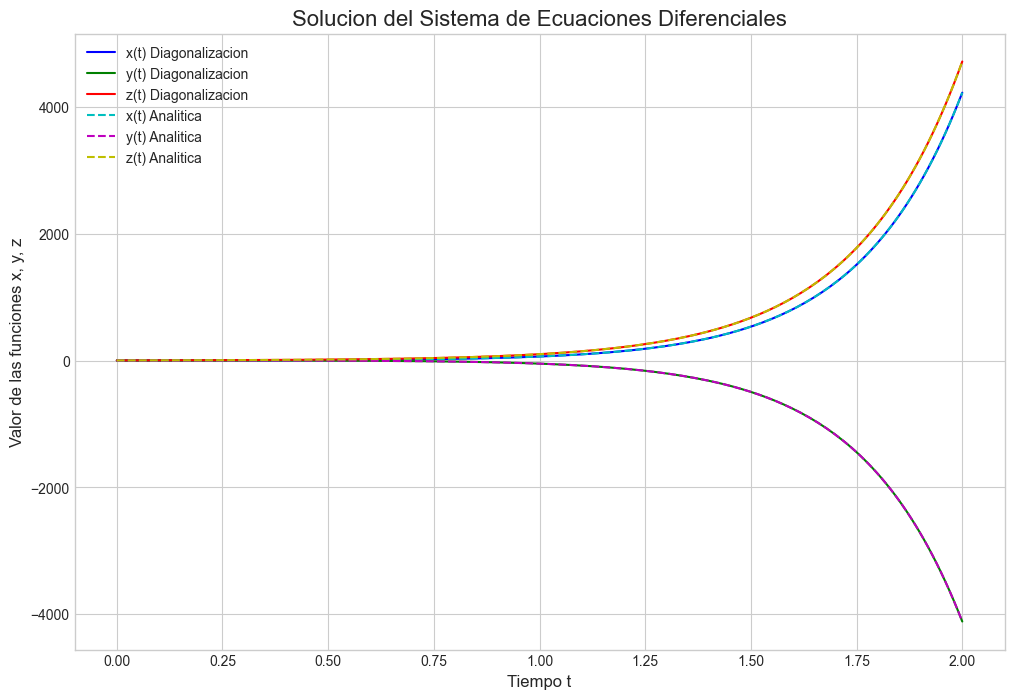

In [16]:
# Se definen las funciones de la solucion analitica proporcionada.
def solucion_analitica(t, r0):
    x0, y0, z0 = r0

    # Se implementan las formulas dadas.
    # Nota: Las formulas son para 2x, 2y, 2z, por lo que se dividen por 2.
    x_t = (x0*(np.exp(2*t)*(1+np.exp(2*t)-2*t)) + y0*(-2*t*np.exp(2*t)) + z0*(np.exp(2*t)*(-1+np.exp(2*t)))) / 2
    y_t = (x0*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t)) + y0*(2*(t+1)*np.exp(2*t)) + z0*(-np.exp(2*t)*(-1+np.exp(2*t)))) / 2
    z_t = (x0*(np.exp(2*t)*(-1+np.exp(2*t)+2*t)) + y0*(2*t*np.exp(2*t)) + z0*(np.exp(2*t)*(1+np.exp(2*t)))) / 2

    return x_t, y_t, z_t

# Se calculan los valores de la solucion analitica.
x_analitico, y_analitico, z_analitico = solucion_analitica(tiempos, r_inicial)

# --- Grafica Comparativa ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Se extraen las soluciones x(t), y(t), z(t) del metodo de diagonalizacion.
x_diag, y_diag, z_diag = solucion_diag[:, 0], solucion_diag[:, 1], solucion_diag[:, 2]

# Se grafica la solucion por diagonalizacion (lineas solidas).
plt.plot(tiempos, x_diag, 'b-', label='x(t) Diagonalizacion')
plt.plot(tiempos, y_diag, 'g-', label='y(t) Diagonalizacion')
plt.plot(tiempos, z_diag, 'r-', label='z(t) Diagonalizacion')

# Se superpone la solucion analitica (lineas punteadas).
plt.plot(tiempos, x_analitico, 'c--', label='x(t) Analitica')
plt.plot(tiempos, y_analitico, 'm--', label='y(t) Analitica')
plt.plot(tiempos, z_analitico, 'y--', label='z(t) Analitica')

plt.title("Solucion del Sistema de Ecuaciones Diferenciales", fontsize=16)
plt.xlabel("Tiempo t", fontsize=12)
plt.ylabel("Valor de las funciones x, y, z", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix} 
B_z & B_x - iB_y \\ 
B_x + iB_y & -B_z 
\end{pmatrix} 
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [17]:
# Se importan las librerias necesarias.
import sympy as sp
import numpy as np

# Se definen las variables simbolicas. Bx, By, Bz son numeros reales.
Bx, By, Bz = sp.symbols('B_x B_y B_z', real=True)

# Se construye la parte matricial del Hamiltoniano.
# El factor constante (-gamma*hbar/2) no afecta la hermiticidad.
matriz_H_simbolica = sp.Matrix([
    [Bz, Bx - sp.I * By],
    [Bx + sp.I * By, -Bz]
])

# Se calcula la transpuesta conjugada (operador daga, †).
matriz_H_daga = matriz_H_simbolica.conjugate().transpose()

# Se verifica si la matriz original es igual a su transpuesta conjugada.
es_hermitica = (matriz_H_simbolica == matriz_H_daga)

print("--- Verificacion de Hermiticidad ---")
print("Matriz H original:")
sp.pretty_print(matriz_H_simbolica)
print("\nMatriz H transpuesta conjugada (H†):")
sp.pretty_print(matriz_H_daga)
print(f"\n¿La matriz es hermitica (H == H†)? {es_hermitica}")

--- Verificacion de Hermiticidad ---
Matriz H original:
⎡   B_z      Bₓ - ⅈ⋅B_y⎤
⎢                      ⎥
⎣Bₓ + ⅈ⋅B_y     -B_z   ⎦

Matriz H transpuesta conjugada (H†):
⎡   B_z      Bₓ - ⅈ⋅B_y⎤
⎢                      ⎥
⎣Bₓ + ⅈ⋅B_y     -B_z   ⎦

¿La matriz es hermitica (H == H†)? True


In [18]:
# Se definen las constantes para el calculo numerico.
gamma = 2.0
hbar = 1.0 # Unidades atomicas
prefactor = -gamma * hbar / 2.0

# Se definen los componentes del campo magnetico.
Bx_num, By_num, Bz_num = 0.0, 0.0, 1.0

# Se construye la matriz numerica del Hamiltoniano.
matriz_H_numerica = prefactor * np.array([
    [Bz_num, Bx_num - 1j*By_num],
    [Bx_num + 1j*By_num, -Bz_num]
])

# Se calculan los autovalores (niveles de energia) y autovectores.
autovalores, autovectores = np.linalg.eig(matriz_H_numerica)

print("\n--- Niveles de Energia Permitidos ---")
print("La matriz del Hamiltoniano para B = (0, 0, 1) es:")
print(matriz_H_numerica)

print(f"\nLos niveles de energia (autovalores) son E1 = {autovalores[0]:.2f} y E2 = {autovalores[1]:.2f}")
print(f"(Estos corresponden a ± ħ, ya que el prefactor -γħ/2 = -{gamma}*{hbar}/2 = -1)")


--- Niveles de Energia Permitidos ---
La matriz del Hamiltoniano para B = (0, 0, 1) es:
[[-1.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j]]

Los niveles de energia (autovalores) son E1 = -1.00+0.00j y E2 = 1.00-0.00j
(Estos corresponden a ± ħ, ya que el prefactor -γħ/2 = -2.0*1.0/2 = -1)


In [20]:
# Se extraen los autovectores calculados por np.linalg.eig.
# Los autovectores son las columnas de la matriz resultante.
estado_1 = autovectores[:, 0]
estado_2 = autovectores[:, 1]

# Se verifica la normalizacion de cada autovector.
# La norma de un vector v es sqrt(v* · v).
norma_1 = np.linalg.norm(estado_1)
norma_2 = np.linalg.norm(estado_2)

print("\n--- Autoestados y Normalizacion ---")
print("El autoestado |Ψ₁> (correspondiente a E₁ = -1.00) es:")
print(estado_1)
print(f"La norma de |Ψ₁> es: {norma_1:.1f}")

print("\nEl autoestado |Ψ₂> (correspondiente a E₂ = 1.00) es:")
print(estado_2)
print(f"La norma de |Ψ₂> es: {norma_2:.1f}")

print("\nAmbos autovectores estan normalizados.")


--- Autoestados y Normalizacion ---
El autoestado |Ψ₁> (correspondiente a E₁ = -1.00) es:
[1.+0.j 0.+0.j]
La norma de |Ψ₁> es: 1.0

El autoestado |Ψ₂> (correspondiente a E₂ = 1.00) es:
[0.+0.j 1.+0.j]
La norma de |Ψ₂> es: 1.0

Ambos autovectores estan normalizados.


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura. 

<center>

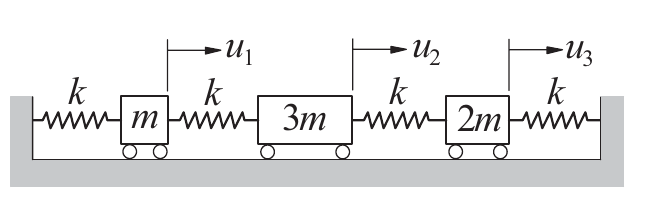
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1 
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2 
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [23]:
# Se definen k=1 y m=1 para obtener la solucion en terminos de sqrt(k/m).
k = 1.0
m = 1.0

# Se define la matriz de rigidez K a partir de las ecuaciones.
matriz_K = k * np.array([
    [-2,  1,  0],
    [ 1, -2,  1],
    [ 0,  1, -2]
])

# Se define la matriz de masa M (diagonal).
matriz_M = m * np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
])

# Se convierte el problema generalizado KU = -ω²MU a un problema estandar AU = λU.
# Para obtener frecuencias reales (solucion fisica estable), se usa -K. (Ley de Hooke, sin el menos el sistema no entrega solucion)
# La matriz del sistema es A = M⁻¹(-K) y sus autovalores λ seran ω².
matriz_sistema_A = np.linalg.inv(matriz_M) @ (-matriz_K)

# Se resuelve el problema de autovalores para la matriz del sistema.
autovalores_lambda, autovectores_U = np.linalg.eig(matriz_sistema_A)

# Las frecuencias de vibracion (ω) son la raiz cuadrada de los autovalores.
frecuencias_angulares_omega = np.sqrt(autovalores_lambda)

# Se presentan los resultados solicitados.
print("--- Frecuencias de Vibracion (ω) en terminos de sqrt(k/m) ---")
print(frecuencias_angulares_omega)

print("\n--- Formas Modales Correspondientes (Autovectores) ---")
print(autovectores_U)

--- Frecuencias de Vibracion (ω) en terminos de sqrt(k/m) ---
[1.4943 0.5028 1.0867]

--- Formas Modales Correspondientes (Autovectores) ---
[[-0.9698 -0.4296 -0.3836]
 [ 0.2259 -0.7505 -0.3142]
 [-0.0916 -0.5022  0.8684]]
